# Real estate forecasting model

RealEstateAI Solutions aims to optimize the real estate prices evaluation through the use of advanced regularization techniques in linear regression models. The objective is to provide more accurate and reliable price forecasts, reducing the risk of overfitting and improving the generalization capability of the model.

In real estate, getting accurate estimates of property prices is crucial to making informed decisions. However, traditional linear regression models may suffer from overfitting, compromising the accuracy of predictions. It is necessary to explore effective regularization methods to improve predictive performance and manage the complexity of the model.

By implementing and comparing regularization methods such as Lasso, Ridge and Elastic Net, RealEstateAI Solutions will offer a system that can provide more accurate and stable real estate price forecasts. This will allow real estate agents and investors to make decisions based on more reliable data, increasing their competitiveness in the market.

**Project Requirements:**

1. **Dataset preparation:**
    - Loading and pre-processing of real estate price data.
    - Management of missing values, coding of categorical variables and data normalization/scaling.
2. **Regression Models Implementation:**
    - **Ridge Regression:** Model implementation and training with Ridge regularization.
    - **Lasso Regression:** Model implementation and training with Lasso regularization.
    - **Elastic Net Regression:** Model implementation and training with Elastic Net regularization.
3. **Performance Evaluation:**
    - Use of cross-validation techniques.
    - Calculation of the Mean Squared Error (MSE) for each model.
    - Comparison of model complexity by estimating the number of non-zero coefficients.
    - Analysis and comparison of the results of the various regularization methods.
4. **Display of results:**
    - Create charts to view and compare model performance.
    - Visualization of residue distribution to assess the adequacy of the model.

# The dataset

The dataset is available here: https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv (freely taken from the following dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

- **price:** the price, the target to be expected
- **area:** surface of the property
- **bedrooms:** number of bedrooms
- **bathrooms:** number of bathrooms
- **stories:** number of floors
- **mainroad:** 1 if the property faces a main road, 0 otherwise
- **guestroom:** 1 if the property has a guest room, 0 otherwise
- **basement:** 1 if the property has a basement, 0 otherwise
- **hotwaterheating:** 1 if the property has a boiler, 0 otherwise
- **airconditioning:** 1 if the property has air conditioning, 0 otherwise
- **parking:** number of car parks
- **area:** 1 if the property is in a prestigious area, 0 otherwise
- **furnishingstatus:** 0 if the property is unfurnished, 1 if it is partially furnished, 2 if it is fully furnished

# Environment set up

In [ ]:
# Library import
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# Set random seed
RANDOM_SEED = 0

# Set seaborn theme
sns.set_theme()

# Define function to evaluate MSE
def MSE_eval(model, dataset):
    X, y = dataset
    y_pred = model.predict(X)

    # R2 not explicitly requested but added as a "support" metric for model evaluation
    return [int(mean_squared_error(y, y_pred)), round(r2_score(y, y_pred), 2)]

# Data preparation

Let's start by importing the provided dataset and proceed with an initial exploratory analysis.

In [ ]:
# Import dataset from link
DATASET_URL = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/'
df = pd.read_csv(DATASET_URL + 'housing.csv', index_col = False)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
# Dataset shape (rows, columns)
df.shape

(545, 13)

In [ ]:
# General dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


Le variabili risultano tutte numeriche e pertanto non si necessita di effettuare Feature Encoding

In [ ]:
# Data overview
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


From a first analysis, the dataset provided consists of 545 records, each of which is composed of 13 distinct attributes. Among these obviously also appears the target of the analysis, that is the price column, so we have 12 features to work with.

There are also no missing data in the dataset, so feature encoding operations are not necessary.

Finally, we can see that the data is all numerical but at very different scales. It will therefore be necessary to standardise them.


In [ ]:
# Standardize data
ss = StandardScaler()
df_standard = pd.DataFrame(ss.fit_transform(df), columns = df.columns)

Now that the data is standardized we can generate a correlation matrix to understand which features most impact the target variable.

<Axes: title={'center': 'Correlation matrix\n'}>

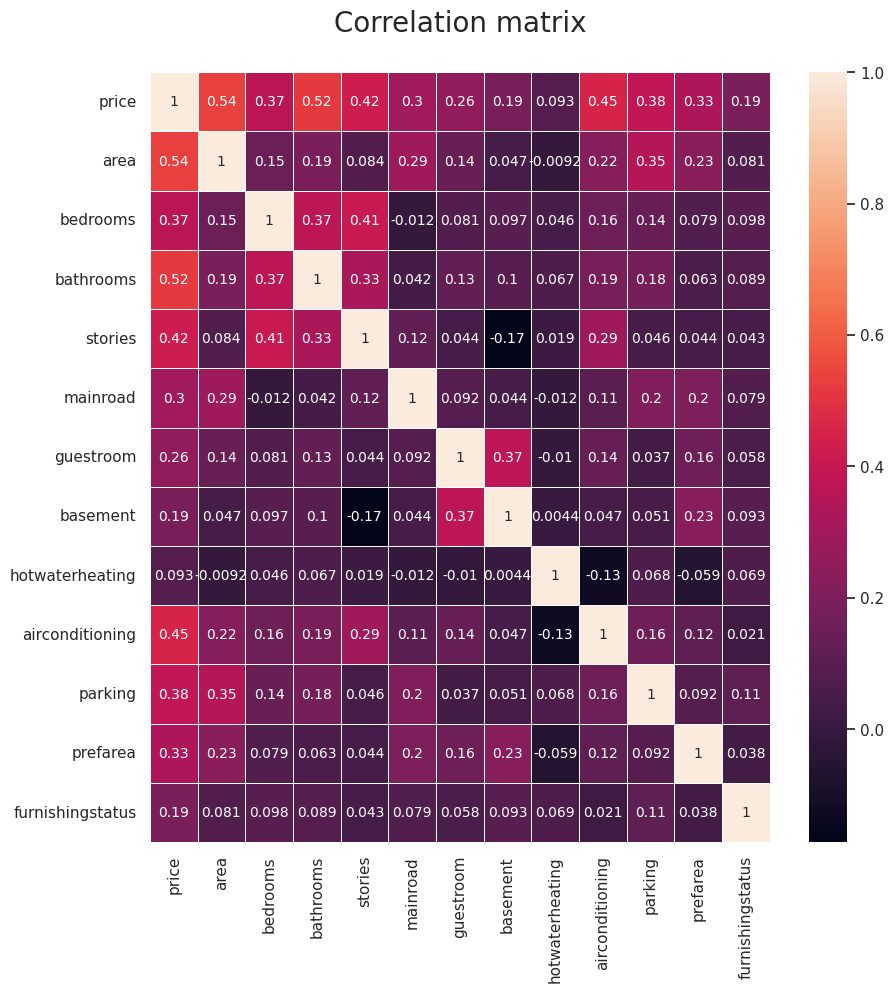

In [ ]:
# Plot correlation matrix
figure(figsize = (10, 10))

# Title
ax = plt.axes()
ax.set_title('Correlation matrix\n', size = 20)

sns.heatmap(df.corr(),
    annot = True,
    xticklabels = list(df.columns),
    yticklabels = list(df.columns),
    linewidth = 0.5,
    annot_kws = {'size': 10})

From the analysis we can see that the features that most affect the target variable are the **area** where the properties are located, the number of **bathrooms** and whether the property is equipped with **air conditioning** or not.

# Model implementation

First let's divide the original dataset into **training data** (70%) and **test data** (30%) for the models.

To do this, we first separate the target variable from the features and then use the *train_test_split* function to break it down into four datasets: *X_train*, *X_test*, *y_train*, *y_test*.

In [ ]:
# Training data
X = df.drop('price', axis = 1).values
X.shape

(545, 12)

In [ ]:
# Test data
y = df['price'].values
y.shape

(545,)

In [ ]:
# Dataset split (train - test separation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_SEED)

In [ ]:
# Check X_train data
X_train.shape

(381, 12)

In [ ]:
# Check X_test data
X_test.shape

(164, 12)

In [ ]:
# Check y_train data
y_train.shape

(381,)

In [ ]:
# Check y_test data
y_test.shape

(164,)

In [ ]:
# Standardize data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Ridge regression

In [ ]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

## Lasso regression

In [ ]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

## Elastic Net regression

In [ ]:
elastic_net_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = RANDOM_SEED)
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=1, random_state=0)

# Performance evaluation

We now perform the performance analysis of the models made.

## Cross evaluation

In [ ]:
# Print corss validation RMSE score for each model
for model in [ridge_model, lasso_model, elastic_net_model]:
    score = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')
    rmse_score = np.sqrt(-score)
    print(f'Ridge Cross-Validation RMSE: \n{rmse_score}')
    print(f'Media RMSE Ridge: {rmse_score.mean()}\n')

Ridge Cross-Validation RMSE: 
[2647419.82811005  984427.83840825  944592.44197872  918382.70722651
 1045942.77384297]
Media RMSE Ridge: 1308153.117913299

Ridge Cross-Validation RMSE: 
[2639984.58110564  988633.76447465  948190.30622395  920826.7741923
 1042286.93466343]
Media RMSE Ridge: 1307984.4721319943

Ridge Cross-Validation RMSE: 
[3116761.28873544  952548.41003189  849029.26432883  919547.80493076
 1465706.76962214]
Media RMSE Ridge: 1460718.7075298124



## MSE and R2 evaluation

In [ ]:
# Print MSE and R2 score for train and test data of each model
for model in [ridge_model, lasso_model, elastic_net_model]:
    print(f'{str(model).split("(")[0]} model')
    print(f'  Train scores:\n    MSE: {MSE_eval(model,(X_train, y_train))[0]}\n    R2: {MSE_eval(model,(X_train, y_train))[1]}')
    print(f'  Test scores:\n    MSE: {MSE_eval(model,(X_test, y_test))[0]}\n    R2: {MSE_eval(model,(X_test, y_test))[1]}\n')

Ridge model
  Train scores:
    MSE: 1204935449596
    R2: 0.66
  Test scores:
    MSE: 961436118597
    R2: 0.72

Lasso model
  Train scores:
    MSE: 1204930725286
    R2: 0.66
  Test scores:
    MSE: 961886232398
    R2: 0.72

ElasticNet model
  Train scores:
    MSE: 1293240227187
    R2: 0.63
  Test scores:
    MSE: 1016384763294
    R2: 0.71



## Non-zero coefficients

In [ ]:
# Calculation of non-zero coefficients for the models
ridge_non_zero_coefficients = np.sum(ridge_model.coef_ != 0)
lasso_non_zero_coefficients = np.sum(lasso_model.coef_ != 0)
elastic_non_zero_coefficients = np.sum(elastic_net_model.coef_ != 0)

print(f'Number of non-zero coefficients (Ridge): {ridge_non_zero_coefficients}')
print(f'Number of non-zero coefficients (Lasso): {lasso_non_zero_coefficients}')
print(f'Number of non-zero coefficients (Elastic Net): {elastic_non_zero_coefficients}')

Number of non-zero coefficients (Ridge): 12
Number of non-zero coefficients (Lasso): 12
Number of non-zero coefficients (Elastic Net): 12


# Analysis of results and performance optimization

The overall performance of the three models produced is very similar, with the Ridge and Lasso models offering slightly higher performance than Elastic Net, as can be seen from the cross validation phase.

The results also suggest a good generalisation capability on test data, and all three models retained all 12 non-zero coefficients.

However, the high values of RMSE and MSE indicate some margin of error, as does the R2 value which indicates that predictions have a certain degree of uncertainty.

Ultimately the models are a solid starting point but certainly can be improved.

## Hyperparameters tuning

Let’s determine for each of the models developed which parameter values optimize performance.

### Ridge model tuning

In [ ]:
# Untuned ridge model (alpha = 1)
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)
untuned_mse_score = MSE_eval(ridge_model,(X_test, y_test))[0]
untuned_r2_score = MSE_eval(ridge_model,(X_test, y_test))[1]

# Ridge model tuning
alpha_param = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search_ridge = GridSearchCV(Ridge(), alpha_param, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

ridge_model = Ridge(alpha = dict(grid_search_ridge.best_params_)['alpha'])
ridge_model.fit(X_train, y_train)
tuned_mse_score = MSE_eval(ridge_model,(X_test, y_test))[0]
tuned_r2_score = MSE_eval(ridge_model,(X_test, y_test))[1]

print(f'Untuned Ridge model scores (alpha = 1):\n- MSE: {untuned_mse_score}\n- R2: {untuned_r2_score}\n')
print(f'Tuned Ridge model scores (alpha = {dict(grid_search_ridge.best_params_)["alpha"]}):\n- MSE: {tuned_mse_score}\n- R2: {tuned_r2_score}\n')
print(f'Ridge model score differences:\n- MSE: {round((tuned_mse_score - untuned_mse_score) / untuned_mse_score * 100, 2)}%\n- R2: {round((tuned_r2_score - untuned_r2_score) / untuned_r2_score * 100, 2)}%')

Untuned Ridge model scores (alpha = 1):
- MSE: 961436118597
- R2: 0.72

Tuned Ridge model scores (alpha = 10.0):
- MSE: 958023427085
- R2: 0.72

Ridge model score differences:
- MSE: -0.35%
- R2: 0.0%


### Lasso model tuning

In [ ]:
# Untuned lasso model (alpha = 1)
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)
untuned_mse_score = MSE_eval(lasso_model,(X_test, y_test))[0]
untuned_r2_score = MSE_eval(lasso_model,(X_test, y_test))[1]

# Lasso model tuning
alpha_param = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search_lasso = GridSearchCV(Lasso(), alpha_param, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

lasso_model = Lasso(alpha = dict(grid_search_lasso.best_params_)['alpha'])
lasso_model.fit(X_train, y_train)
tuned_mse_score = MSE_eval(lasso_model,(X_test, y_test))[0]
tuned_r2_score = MSE_eval(lasso_model,(X_test, y_test))[1]

print(f'Untuned Lasso model scores (alpha = 1):\n- MSE: {untuned_mse_score}\n- R2: {untuned_r2_score}\n')
print(f'Tuned Lasso model scores (alpha = {dict(grid_search_lasso.best_params_)["alpha"]}):\n- MSE: {tuned_mse_score}\n- R2: {tuned_r2_score}\n')
print(f'Lasso model score differences:\n- MSE: {round((tuned_mse_score - untuned_mse_score) / untuned_mse_score * 100, 2)}%\n- R2: {round((tuned_r2_score - untuned_r2_score) / untuned_r2_score * 100, 2)}%')

Untuned Lasso model scores (alpha = 1):
- MSE: 961886232398
- R2: 0.72

Tuned Lasso model scores (alpha = 0.001):
- MSE: 961887081406
- R2: 0.72

Lasso model score differences:
- MSE: 0.0%
- R2: 0.0%


### Elastic Net model tuning

In [ ]:
# Untuned elastic_net_model model (alpha = 1, l1_ratio = 0.5)
elastic_net_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = RANDOM_SEED)
elastic_net_model.fit(X_train, y_train)
untuned_mse_score = MSE_eval(elastic_net_model,(X_test, y_test))[0]
untuned_r2_score = MSE_eval(elastic_net_model,(X_test, y_test))[1]

# Elastic Net model tuning
alpha_l1_ration_param = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0.0, 1.01, 0.1)
}
grid_search_elastic_net = GridSearchCV(ElasticNet(), alpha_l1_ration_param, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_elastic_net.fit(X_train, y_train)

elastic_net_model = ElasticNet(alpha = dict(grid_search_elastic_net.best_params_)['alpha'])
elastic_net_model.fit(X_train, y_train)
tuned_mse_score = MSE_eval(elastic_net_model,(X_test, y_test))[0]
tuned_r2_score = MSE_eval(elastic_net_model,(X_test, y_test))[1]

# Ignore warnings
warnings.filterwarnings('ignore')

print(f'Untuned Elastic Net model scores (alpha = 1, l1_ratio = 0.5):\n- MSE: {untuned_mse_score}\n- R2: {untuned_r2_score}\n')
print(f'Tuned Elastic Net model scores (alpha = {dict(grid_search_elastic_net.best_params_)["alpha"]}, l1_ratio = {dict(grid_search_elastic_net.best_params_)["l1_ratio"]}):\n- MSE: {tuned_mse_score}\n- R2: {tuned_r2_score}\n')
print(f'Elastic Net model score differences:\n- MSE: {round((tuned_mse_score - untuned_mse_score) / untuned_mse_score * 100, 2)}%\n- R2: {round((tuned_r2_score - untuned_r2_score) / untuned_r2_score * 100, 2)}%')

Untuned Elastic Net model scores (alpha = 1, l1_ratio = 0.5):
- MSE: 1016384763294
- R2: 0.71

Tuned Elastic Net model scores (alpha = 0.1, l1_ratio = 0.1):
- MSE: 955662161569
- R2: 0.72

Elastic Net model score differences:
- MSE: -5.97%
- R2: 1.41%


After tuning the hyperparameters of the models we can see that Ridge and Lasso models have not reported any noteworthy improvements. Only the Elastic Net model has slightly improved the scores, reporting a reduction in MSE score of about 6% and an increase of R2 score of almost 1.5%.

# Display of results

Let's study the performance of the three models developed.

## Ridge regression learning curve

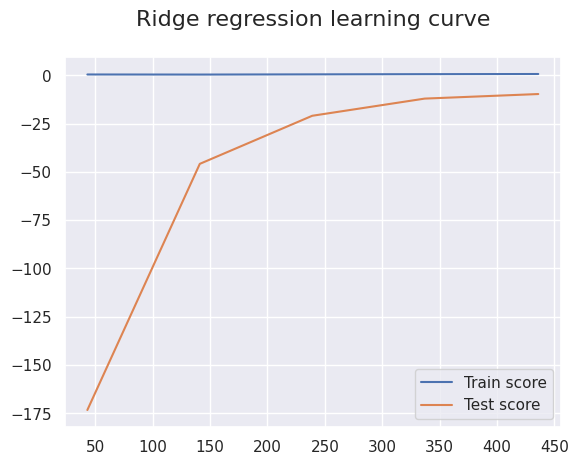

In [ ]:
# Plot Ridge model learning curve
train_sizes_abs, train_scores, test_scores = learning_curve (
    Ridge(alpha = 10),
    X,
    y,
    random_state = RANDOM_SEED)

plt.plot(train_sizes_abs, train_scores.mean(axis = 1), label = 'Train score')
plt.plot(train_sizes_abs, test_scores.mean(axis = 1), label = 'Test score')
plt.legend()
plt.title('Ridge regression learning curve\n', size = 16)
plt.show()

## Lasso regression learning curve

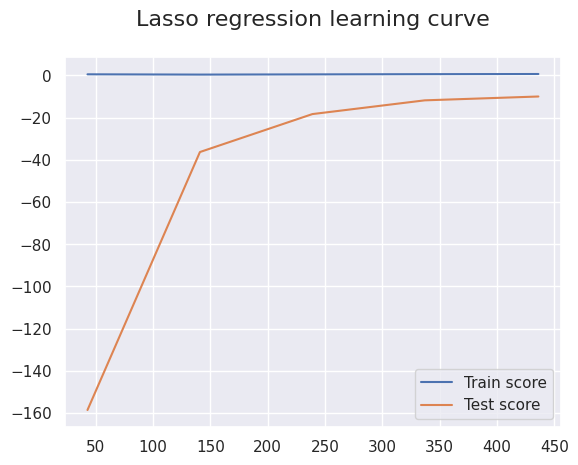

In [ ]:
# Plot Lasso model learning curve
train_sizes_abs, train_scores, test_scores = learning_curve (
    Lasso(alpha = 10),
    X,
    y,
    random_state = RANDOM_SEED)

plt.plot(train_sizes_abs, train_scores.mean(axis = 1), label = 'Train score')
plt.plot(train_sizes_abs, test_scores.mean(axis = 1), label = 'Test score')
plt.legend()
plt.title('Lasso regression learning curve\n', size = 16)
plt.show()

## Elastic Net regression learning curve

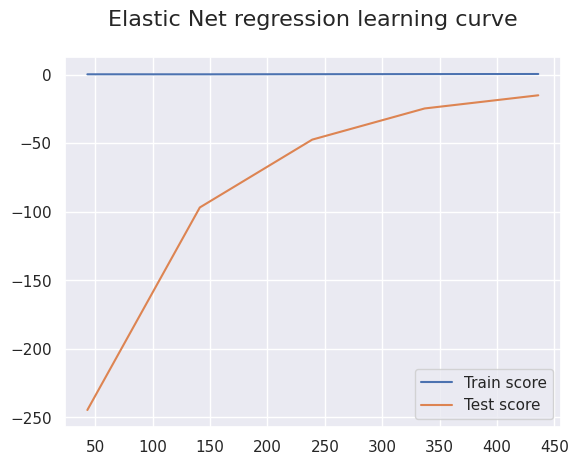

In [ ]:
# Plot Elastic Net model learning curve
train_sizes_abs, train_scores, test_scores = learning_curve (
    ElasticNet(alpha = 10),
    X,
    y,
    random_state = RANDOM_SEED)

plt.plot(train_sizes_abs, train_scores.mean(axis = 1), label = 'Train score')
plt.plot(train_sizes_abs, test_scores.mean(axis = 1), label = 'Test score')
plt.legend()
plt.title('Elastic Net regression learning curve\n', size = 16)
plt.show()

As can be seen from the charts, the learning rate of the Ridge and Lasso models is quite similar. This was also obvious by observing the performance of the two models that are very similar to each other.

A little less marked is the learning curve of the Elastic Net model which, even after tuning, continues to be the least performing of the models produced.

## Prevision comparison and residue distribution

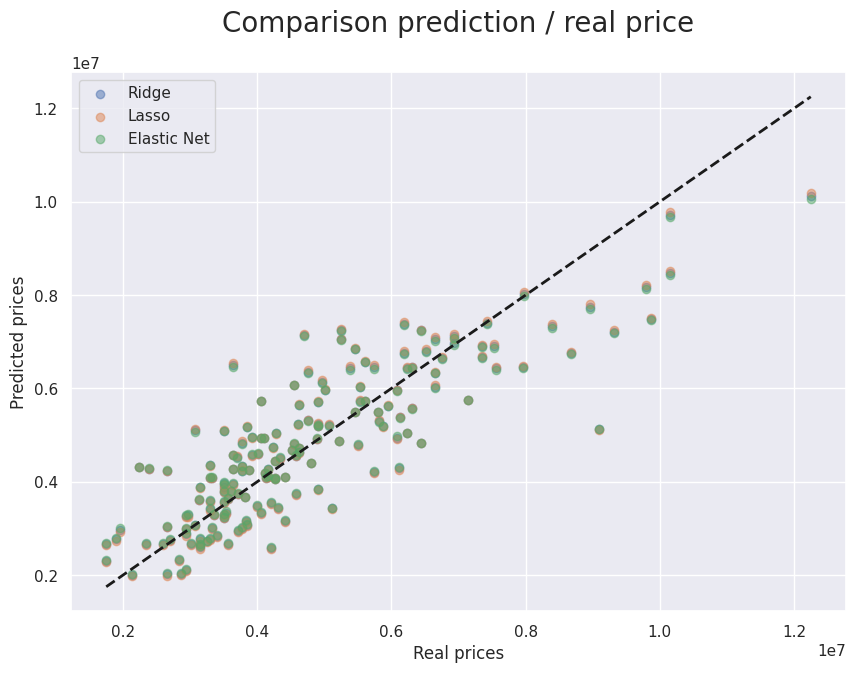

In [ ]:
# Plot models predictions / real price comparison
plt.figure(figsize = (10, 7))

plt.scatter(y_test, ridge_model.predict(X_test), alpha = 0.5, label = 'Ridge')
plt.scatter(y_test, lasso_model.predict(X_test), alpha = 0.5, label = 'Lasso')
plt.scatter(y_test, elastic_net_model.predict(X_test), alpha = 0.5, label = 'Elastic Net')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)

plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.title('Comparison prediction / real price\n', size = 20)
plt.legend()
plt.grid(True)
plt.show()

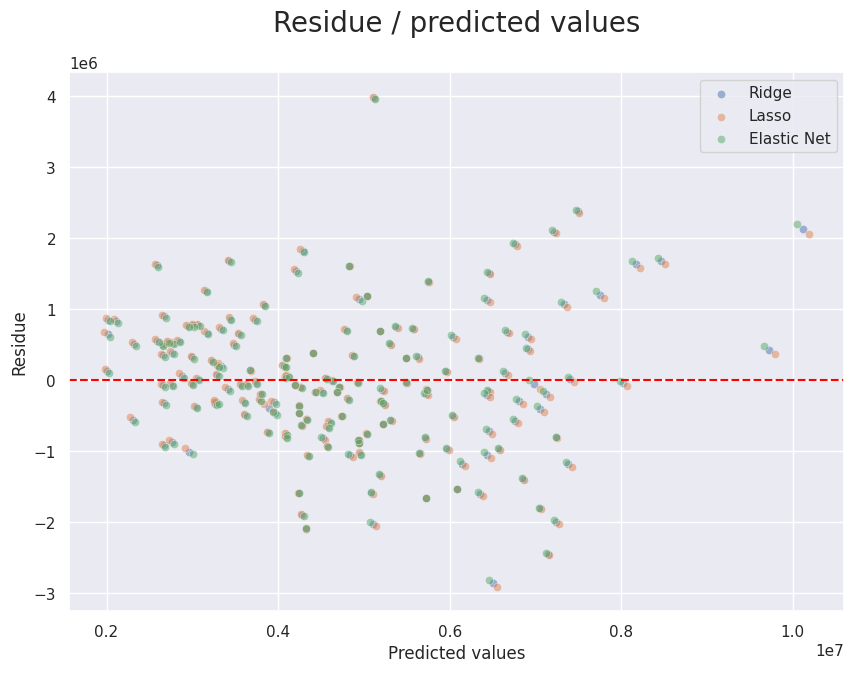

In [ ]:
# Plot models predictions/real price comparison
plt.figure(figsize=(10, 7))

y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

ridge_residuals = y_test - y_pred_ridge
lasso_residuals = y_test - y_pred_lasso
elastic_net_residuals = y_test - y_pred_elastic_net

sns.scatterplot(x = y_pred_ridge, y = ridge_residuals, alpha = 0.5, label = 'Ridge')
sns.scatterplot(x = y_pred_lasso, y = lasso_residuals, alpha = 0.5, label = 'Lasso')
sns.scatterplot(x = y_pred_elastic_net, y = elastic_net_residuals, alpha = 0.5, label = 'Elastic Net')

plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Predicted values')
plt.ylabel('Residue')
plt.title('Residue / predicted values\n', size = 20)
plt.grid(True)
plt.legend()
plt.show()

As seen above, the Ridge and Lasso models offer similar performance (and therefore predictions). In both graphs the points representing their predictions are practically overlapping, with the Lasso model predictions covering the one of the Ridge model.

The Elastic Net model, on the other hand, deviates slightly with predictions that, even after tuning, differ from the other two models.

# Conclusions

The project successfully achieved its goal of building a robust and reliable real estate price forecasting model for RealEstateAI Solutions. By implementing and comparing different regularization techniques (specifically **Lasso**, **Ridge**, and **Elastic Net**) the model was able to produce accurate and stable predictions.

The primary challenge in real estate price prediction is creating a model that is not overly influenced by small changes in the training data, a problem known as *overfitting*. The use of regularization methods addresses this by reducing the complexity of the model, thus improving its ability to generalize to new, unseen data. This means the model can provide trustworthy forecasts not only for the properties it was trained on but also for new properties entering the market.

In essence, the implemented solution provides a powerful tool for real estate agents and investors, allowing them to make informed decisions based on more reliable data and, in turn, increase their competitive edge in the market.